# Final Data Analysis for A&E Optimization Project

This notebook explores the integrated final dataset that combines:
- Population data
- Hospital location information
- A&E activity data

The analysis will help understand patterns and relationships that can inform optimization strategies for A&E services across Scotland.

## 1. Import Required Libraries

We'll use the following libraries:
- **pandas**: For data manipulation and analysis
- **matplotlib** and **seaborn**: For data visualization
- **geopandas**: For spatial data operations (if needed)
- **numpy**: For numerical operations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Load the Final Dataset

Let's load the FINAL_DATA.csv file that was created in the data transformation process. This dataset contains the integrated information from multiple sources.

In [2]:
# Load the final dataset
final_data = pd.read_csv("../../data/FINAL_DATA.csv")

# Display basic information
print(f"Dataset dimensions: {final_data.shape[0]} rows and {final_data.shape[1]} columns")
print("\n")

# Display the first few rows
print("First 5 rows of the dataset:")
final_data.head()

Dataset dimensions: 67716 rows and 24 columns


First 5 rows of the dataset:


,Unnamed: 0,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,NumberOver8HoursEpisode,NumberOver12HoursEpisode,HospitalName,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone,AllAges,Age,Population
0,1441888,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,0,2.0
1,1441889,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,1,5.0
2,1441890,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,2,3.0
3,1441891,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,3,5.0
4,1441892,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,4,3.0


## 3. Explore Data Structure and Quality

Let's examine the structure of the dataset, including column names, data types, and missing values. This will help us understand the data quality before diving into the analysis.

In [3]:
# Display column information
print("Column names and data types:")
print(final_data.dtypes)
print("\n")

# Check for missing values
print("Missing values by column:")
missing_values = final_data.isnull().sum().sort_values(ascending=False)
missing_percent = (final_data.isnull().sum() / len(final_data) * 100).sort_values(ascending=False)
missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Count', 'Missing Percent'])
print(missing_df[missing_df['Missing Count'] > 0])

Column names and data types:
Unnamed: 0                      int64
Month                           int64
Country                        object
HBT                            object
TreatmentLocation              object
DepartmentType                 object
NumberOfAttendancesAll          int64
NumberWithin4HoursAll           int64
NumberOver4HoursAll             int64
NumberOfAttendancesEpisode    float64
NumberWithin4HoursEpisode     float64
NumberOver4HoursEpisode       float64
NumberOver8HoursEpisode       float64
NumberOver12HoursEpisode      float64
HospitalName                   object
Postcode                       object
HealthBoard                    object
HSCP                           object
CouncilArea                    object
IntermediateZone               object
DataZone                       object
AllAges                       float64
Age                            object
Population                    float64
dtype: object


Missing values by column:
                 

## 4. Data Overview

Let's get a statistical summary of the dataset to understand the distribution of key variables.

In [4]:
# Generate descriptive statistics
print("Descriptive statistics for numerical columns:")
final_data.describe().T

Descriptive statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,67716.0,1.475746e+06,19548.069751,1441888.0,1458816.75,1475745.5,1492674.25,1509603.0
Month,67716.0,2.024482e+05,46.377121,202406.0,202408.75,202411.5,202502.25,202505.0
NumberOfAttendancesAll,67716.0,2.192308e+03,2466.852128,1.0,271.00,911.0,3836.00,11150.0
NumberWithin4HoursAll,67716.0,1.510159e+03,1521.367501,1.0,270.00,795.0,2388.00,7620.0
NumberOver4HoursAll,67716.0,6.821493e+02,1117.764355,-27.0,1.00,52.0,998.00,5534.0
NumberOfAttendancesEpisode,51324.0,2.831996e+03,2515.587634,9.0,689.25,2082.5,4942.50,11150.0
NumberWithin4HoursEpisode,51324.0,1.932862e+03,1518.460969,9.0,616.00,1701.0,2870.75,7620.0
NumberOver4HoursEpisode,51324.0,8.991348e+02,1205.788741,0.0,11.00,190.0,1515.75,5534.0
NumberOver8HoursEpisode,51324.0,3.122996e+02,482.182471,0.0,0.00,19.0,538.25,2457.0
NumberOver12HoursEpisode,51324.0,1.377092e+02,238.806270,0.0,0.00,3.0,223.25,1527.0


## 5. Temporal Analysis

Let's analyze how A&E performance metrics have changed over time. This analysis will help identify seasonal patterns or trends in wait times and attendance numbers.

In this section, we will create a dual-axis chart that displays:

1. **Blue Line**: Total number of A&E attendances per month, shown on the left Y-axis. This line reveals patterns in patient volume across the year, highlighting potential seasonal increases (e.g., winter months) or other temporal patterns.

2. **Red Line**: The 4-hour compliance rate percentage per month, shown on the right Y-axis. This measures the proportion of patients who were seen, treated, and discharged or admitted within 4 hours of arrival.

3. **Red Dashed Line**: The NHS 95% target for 4-hour compliance. The NHS standard requires that 95% of patients attending A&E should be admitted, transferred, or discharged within 4 hours of arrival. This target serves as a key performance benchmark for A&E departments across Scotland.

This visualization allows us to examine the relationship between attendance volume and compliance rates, revealing whether busier periods correlate with lower compliance rates, or if other factors may be influencing A&E performance.

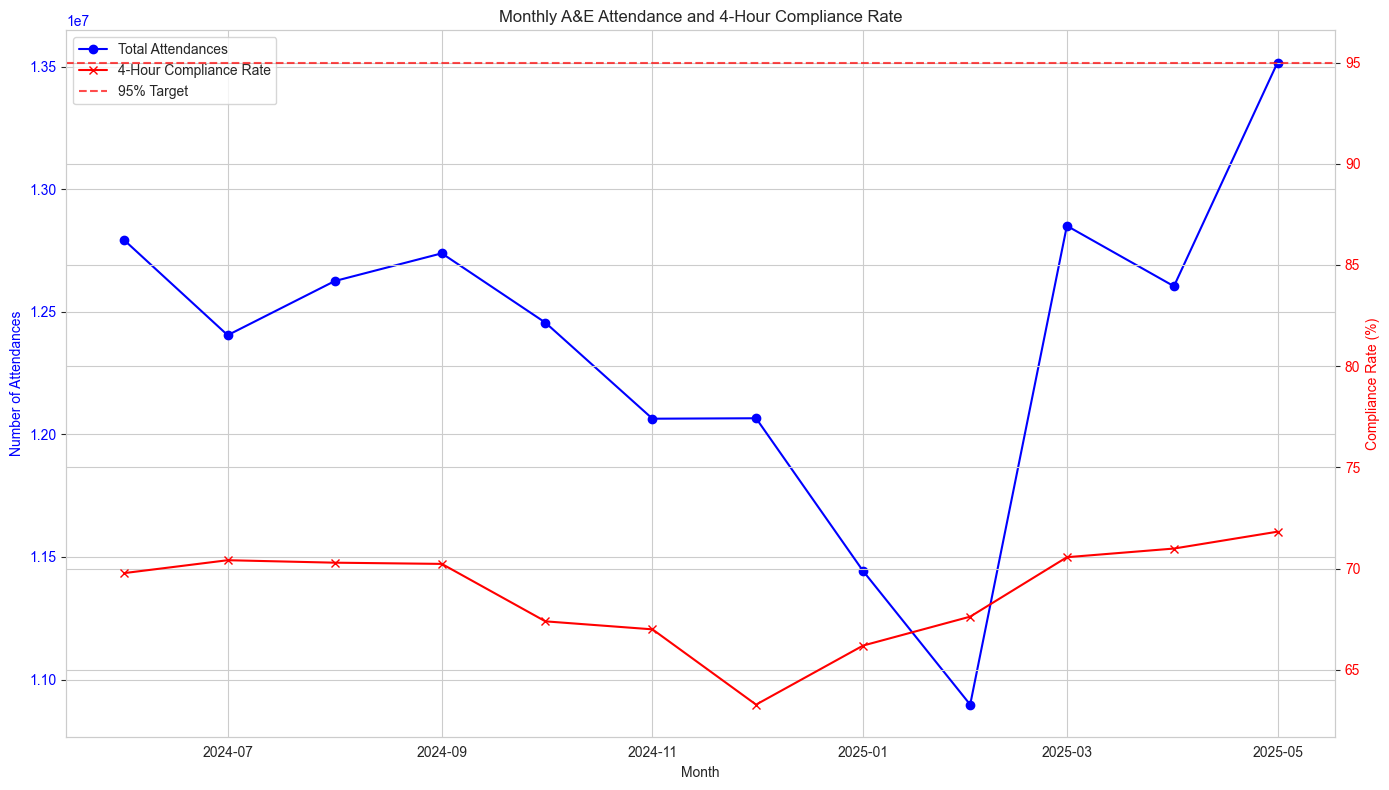

Monthly trends analysis completed.


In [5]:
# Check if 'Month' column exists and convert to datetime if needed
if 'Month' in final_data.columns:
    # Convert Month column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(final_data['Month']):
        try:
            final_data['Month'] = pd.to_datetime(final_data['Month'], format='%Y%m')
        except:
            print("Could not convert Month column to datetime. Attempting to continue analysis.")
    
    # Group by month and analyze trends
    try:
        monthly_stats = final_data.groupby('Month').agg({
            'NumberOfAttendancesAll': 'sum',
            'NumberWithin4HoursAll': 'sum',
            'NumberOver4HoursAll': 'sum'
        }).reset_index()
        
        # Calculate 4-hour compliance percentage
        monthly_stats['ComplianceRate'] = (monthly_stats['NumberWithin4HoursAll'] / 
                                          monthly_stats['NumberOfAttendancesAll'] * 100)
        
        # Plot monthly trends
        fig, ax1 = plt.subplots(figsize=(14, 8))
        
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Number of Attendances', color='blue')
        ax1.plot(monthly_stats['Month'], monthly_stats['NumberOfAttendancesAll'], 
                color='blue', marker='o', label='Total Attendances')
        ax1.tick_params(axis='y', labelcolor='blue')
        
        ax2 = ax1.twinx()
        ax2.set_ylabel('Compliance Rate (%)', color='red')
        ax2.plot(monthly_stats['Month'], monthly_stats['ComplianceRate'], 
                color='red', marker='x', label='4-Hour Compliance Rate')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% Target')
        
        # Add legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.title('Monthly A&E Attendance and 4-Hour Compliance Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("Monthly trends analysis completed.")
    except Exception as e:
        print(f"Error in temporal analysis: {e}")
else:
    print("Month column not found in the dataset. Skipping temporal analysis.")

## 6. Geographic Distribution Analysis

Let's explore how A&E metrics vary across different locations. This will help identify areas that might be underserved or experiencing performance issues.

Analyzing A&E performance by TreatmentLocation
Top 10 locations by attendance volume:


,TreatmentLocation,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,ComplianceRate
49,S314H,11562551,6317857,5244694,54.640684
21,G405H,9208199,4723446,4484753,51.296089
18,G107H,7687953,4205929,3482024,54.708048
22,G513H,6795607,6163612,631995,90.699948
37,L308H,6632444,3736551,2895893,56.337468
14,F704H,6396208,4178902,2217306,65.334054
48,S308H,6057688,3960229,2097459,65.375255
35,L106H,5923372,3348163,2575209,56.524611
36,L302H,5774405,3032484,2741921,52.515956
51,T101H,5695326,4941846,753480,86.770204


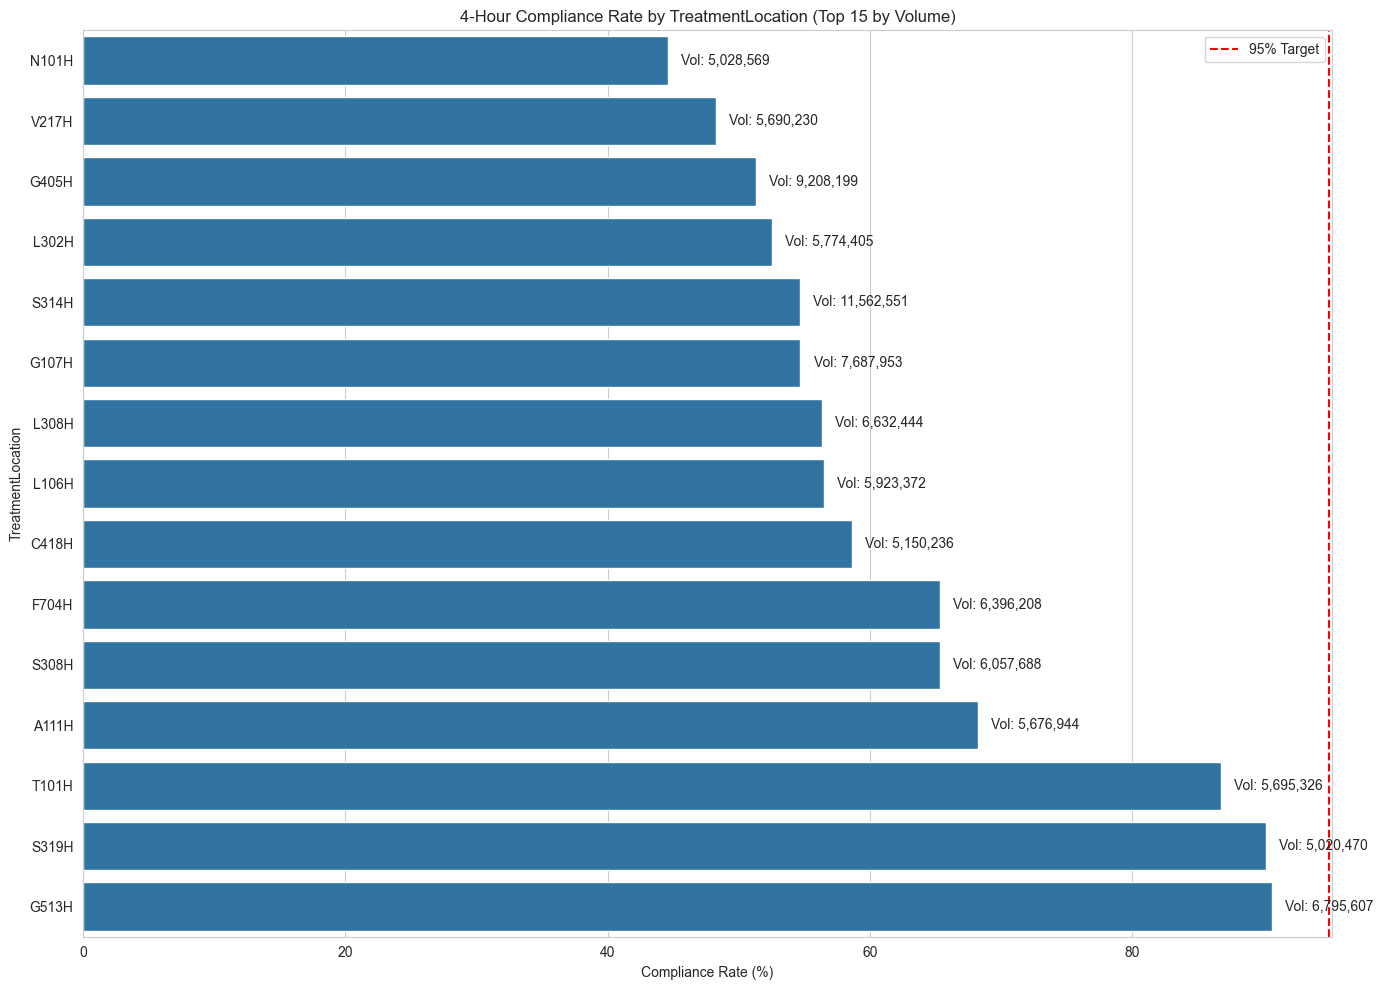

In [6]:
# Check if relevant location columns exist
location_cols = ['TreatmentLocation', 'HospitalName', 'OrganisationName']
available_cols = [col for col in location_cols if col in final_data.columns]

if available_cols:
    print(f"Analyzing A&E performance by {available_cols[0]}")
    
    try:
        # Group by location and calculate performance metrics
        location_perf = final_data.groupby(available_cols[0]).agg({
            'NumberOfAttendancesAll': 'sum',
            'NumberWithin4HoursAll': 'sum',
            'NumberOver4HoursAll': 'sum'
        }).reset_index()
        
        # Calculate compliance rate
        location_perf['ComplianceRate'] = (location_perf['NumberWithin4HoursAll'] / 
                                          location_perf['NumberOfAttendancesAll'] * 100)
        
        # Sort by attendance volume
        location_perf = location_perf.sort_values('NumberOfAttendancesAll', ascending=False)
        
        # Display top 10 locations by attendance
        print("Top 10 locations by attendance volume:")
        display(location_perf.head(10))
        
        # Visualize compliance rate by location (top 15)
        plt.figure(figsize=(14, 10))
        top15 = location_perf.head(15).sort_values('ComplianceRate')
        
        bars = sns.barplot(x='ComplianceRate', y=available_cols[0], data=top15)
        
        # Add volume information as text
        for i, row in enumerate(top15.itertuples()):
            volume = f"{row.NumberOfAttendancesAll:,.0f}"
            bars.text(row.ComplianceRate + 1, i, f"Vol: {volume}", va='center')
        
        plt.axvline(x=95, color='red', linestyle='--', label='95% Target')
        plt.title(f'4-Hour Compliance Rate by {available_cols[0]} (Top 15 by Volume)')
        plt.xlabel('Compliance Rate (%)')
        plt.tight_layout()
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"Error in geographic analysis: {e}")
else:
    print("No location columns found in the dataset. Skipping geographic analysis.")

## 8. Performance Analysis

Let's analyze the performance of A&E services against key metrics such as waiting times and 4-hour compliance targets.

Performance comparison by department type:


,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,ComplianceRate
0,Type 1,127031177,82616898,44414279,65.036710
1,Type 3,21423163,19645023,1778140,91.699918


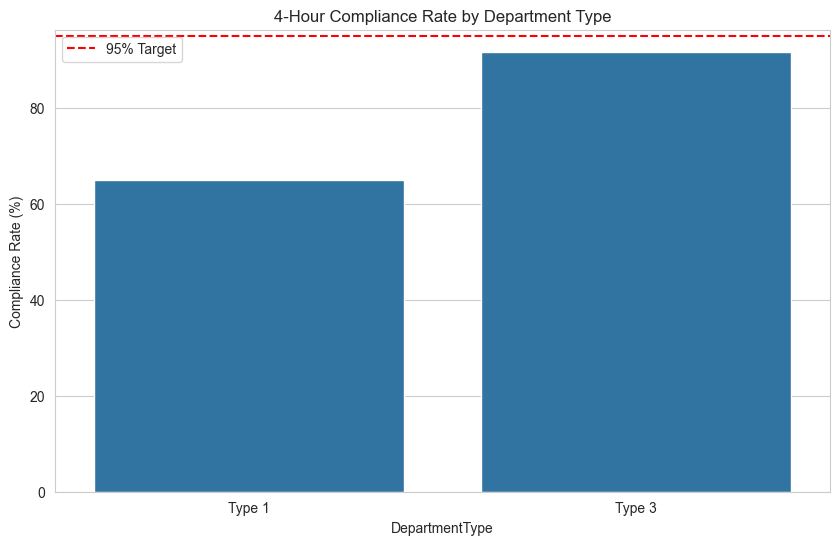

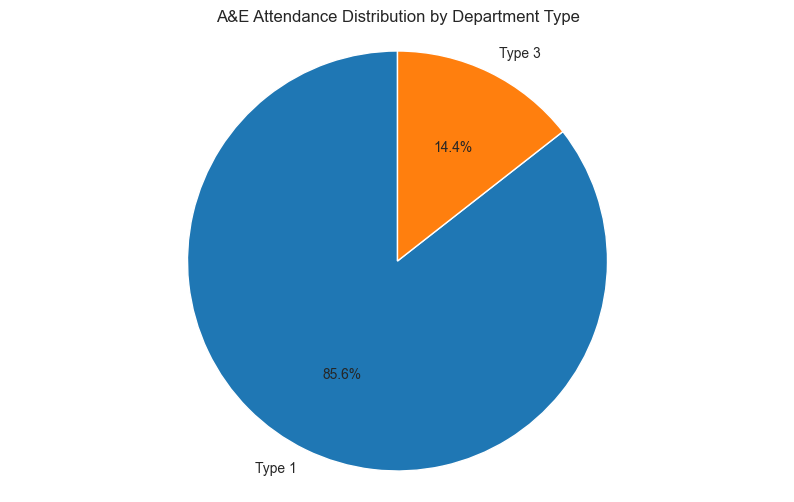

In [10]:
# Check if department type column exists
if 'DepartmentType' in final_data.columns:
    try:
        # Compare performance metrics by department type
        dept_perf = final_data.groupby('DepartmentType').agg({
            'NumberOfAttendancesAll': 'sum',
            'NumberWithin4HoursAll': 'sum',
            'NumberOver4HoursAll': 'sum'
        }).reset_index()
        
        # Calculate compliance rate
        dept_perf['ComplianceRate'] = (dept_perf['NumberWithin4HoursAll'] / 
                                       dept_perf['NumberOfAttendancesAll'] * 100)
        
        # Calculate average waiting time if available
        if 'WaitingTime' in final_data.columns:
            wait_by_dept = final_data.groupby('DepartmentType')['WaitingTime'].mean().reset_index()
            dept_perf = pd.merge(dept_perf, wait_by_dept, on='DepartmentType')
        
        print("Performance comparison by department type:")
        display(dept_perf)
        
        # Create bar chart for compliance rate by department type
        plt.figure(figsize=(10, 6))
        sns.barplot(x='DepartmentType', y='ComplianceRate', data=dept_perf)
        plt.axhline(y=95, color='red', linestyle='--', label='95% Target')
        plt.title('4-Hour Compliance Rate by Department Type')
        plt.ylabel('Compliance Rate (%)')
        plt.legend()
        plt.show()
        
        # Create pie chart for attendance distribution
        plt.figure(figsize=(10, 6))
        plt.pie(dept_perf['NumberOfAttendancesAll'], labels=dept_perf['DepartmentType'], 
                autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('A&E Attendance Distribution by Department Type')
        plt.show()
        
    except Exception as e:
        print(f"Error in performance analysis: {e}")
else:
    print("DepartmentType column not found in the dataset. Skipping department performance analysis.")

## 9. Correlation Analysis

Let's explore relationships between different variables in the dataset to identify potential factors affecting A&E performance.

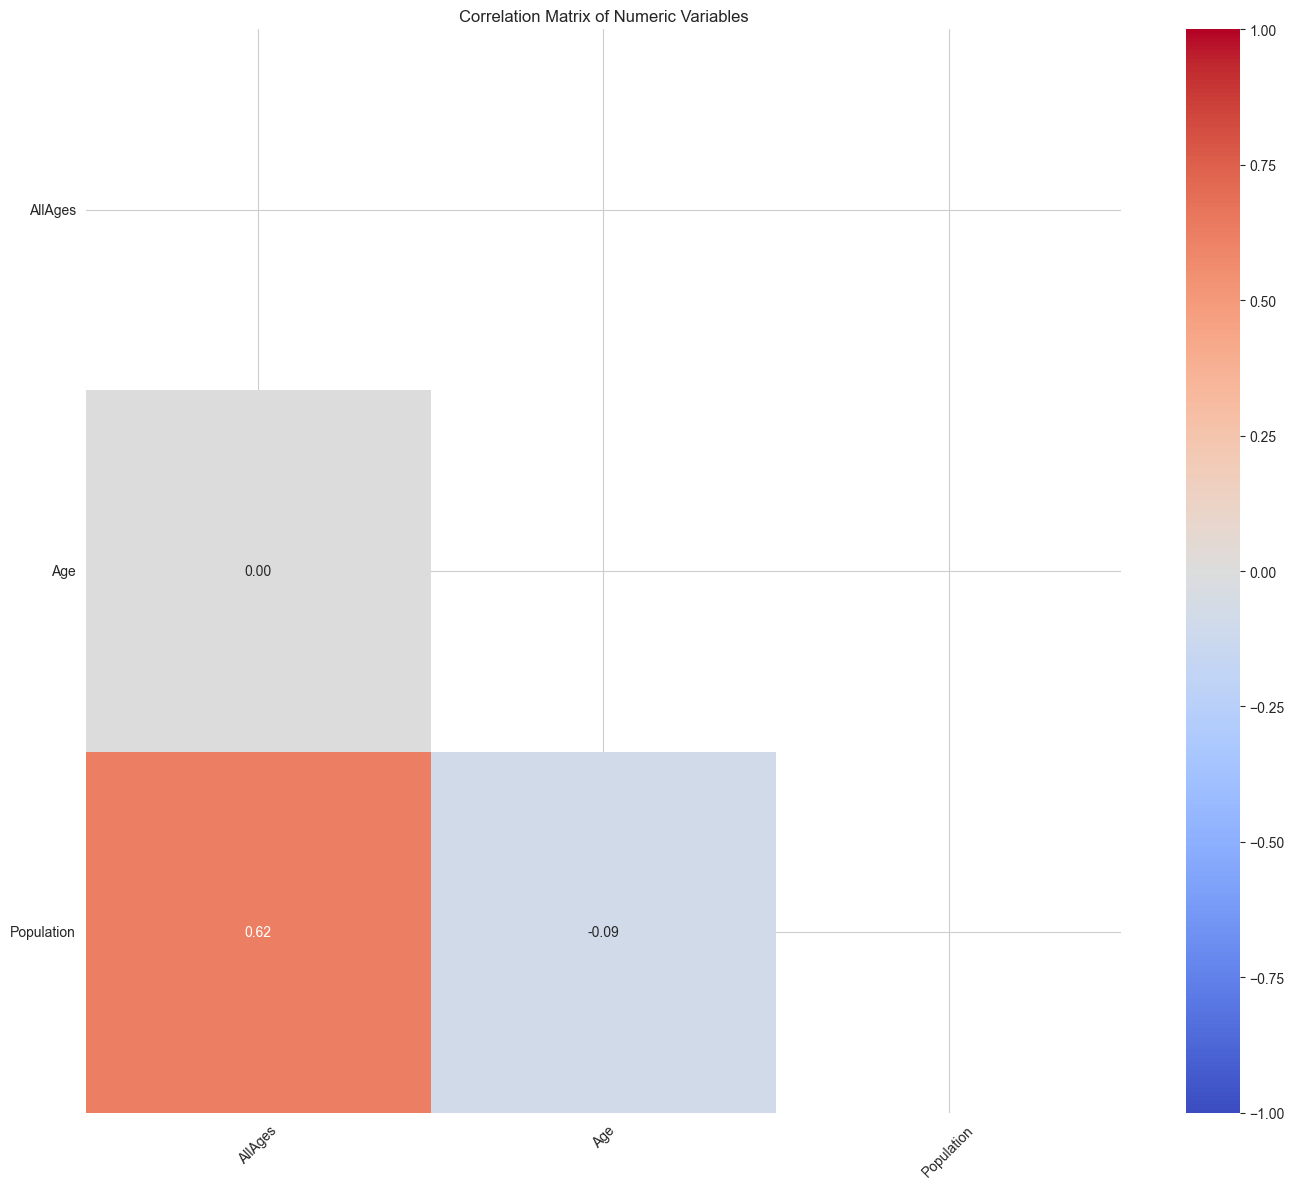

Top 10 strongest correlations:
Population  AllAges       6.216522e-01
AllAges     Population    6.216522e-01
Age         AllAges       1.714688e-16
AllAges     Age           1.714688e-16
Age         Population   -9.011934e-02
Population  Age          -9.011934e-02
dtype: float64


In [11]:
# Select numeric columns for correlation analysis
numeric_cols = final_data.select_dtypes(include=['number']).columns.tolist()

# Filter out columns with too many unique values (likely IDs) or all NaN
filtered_cols = [col for col in numeric_cols 
                if final_data[col].nunique() < 100 and  # Remove ID-like columns
                not final_data[col].isna().all()]       # Remove all-NaN columns

if len(filtered_cols) >= 2:
    try:
        # Calculate correlation matrix
        corr_matrix = final_data[filtered_cols].corr()
        
        # Plot heatmap
        plt.figure(figsize=(14, 12))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                    mask=mask, vmin=-1, vmax=1, center=0)
        plt.title('Correlation Matrix of Numeric Variables')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Identify strongest correlations
        corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
        # Remove self-correlations and duplicates
        corr_pairs = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > -1.0)]
        
        print("Top 10 strongest correlations:")
        print(corr_pairs.head(10))
        
    except Exception as e:
        print(f"Error in correlation analysis: {e}")
else:
    print("Not enough numeric columns for correlation analysis.")